<a href="https://colab.research.google.com/github/preetikhullbe/House-image-classifier/blob/main/image_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import numpy as np
import shutil
import os

In [ ]:
import imageio as iio

In [ ]:
# import required module
from pathlib import Path

# get the path/directory
folder_dir = "/content/drive/MyDrive/Bedroom"

# iterate over files in
# that directory
images = Path(folder_dir).glob('*.png')
for image in images:
    print(image)

In [ ]:
print(images)

<generator object Path.glob at 0x7b3485461fc0>


In [ ]:
!pip install matplotlib pillow

In [ ]:
# prompt: print some images from the folder dir

import matplotlib.pyplot as plt
from pathlib import Path
import imageio as iio
from PIL import Image
import os

# get the path/directory
folder_dir = "/content/drive/MyDrive/Bedroom"


In [ ]:
# List all files in the directory
images_list = os.listdir(folder_dir)

# Filter out non-image files (optional)
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
images_list = [img for img in images_list if img.lower().endswith(valid_extensions)]

# Function to display images
def display_images(images_list, folder_dir, num_images=5):
    plt.figure(figsize=(20, 10))

    for i, img_name in enumerate(images_list[:num_images]):
        img_path = os.path.join(folder_dir, img_name)
        img = Image.open(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis('off')

    plt.show()


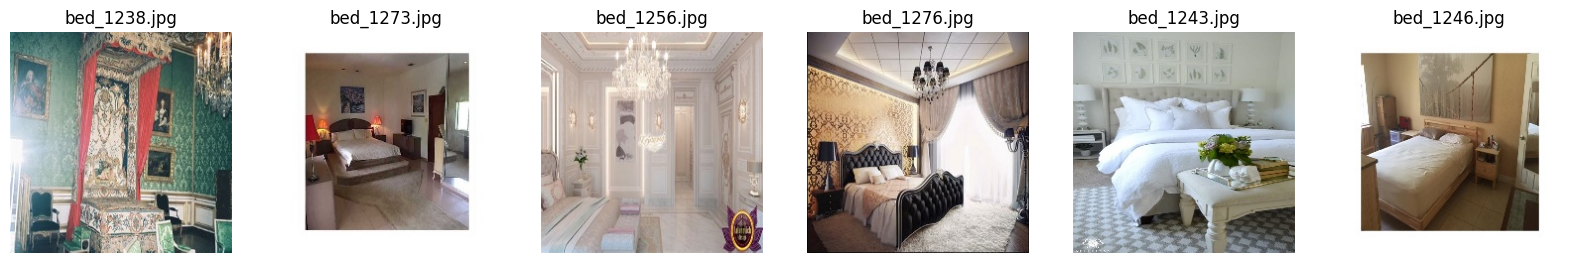

In [ ]:
# Display the first 5 images
display_images(images_list, folder_dir, num_images=6)